## Домашнее задание 1

In [2]:
import pandas as pd
spam = pd.read_csv('/Users/macbookpro/Downloads/spam.csv', encoding='cp1251')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = CountVectorizer()
bag_of_words = vec.fit_transform(spam.v2)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, spam.v1)

In [5]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [6]:
my_text = vec.transform(['Free entry in 2 a wkly comp to win FA Cup', 'мама мыла рама'])
my_text

<2x8705 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [7]:
clf.predict(my_text)

array(['spam', 'ham'], dtype='<U4')

In [8]:
clf.predict_proba(my_text)

array([[4.64711004e-07, 9.99999535e-01],
       [8.67432400e-01, 1.32567600e-01]])

In [9]:
from sklearn.metrics import classification_report

In [10]:
predicted_labels = clf.predict(X_test)
predicted_labels

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [11]:
print(classification_report(y_test, predicted_labels))

             precision    recall  f1-score   support

        ham       0.99      0.98      0.99      1200
       spam       0.90      0.96      0.93       193

avg / total       0.98      0.98      0.98      1393



## Домашнее задание 2

In [12]:
df = pd.read_csv('/Users/macbookpro/Downloads/reviews.csv')

In [13]:
df.head()

,label,text
0,1,Эпиграф Добро которое ты делаешь от сердца ты ...
1,1,Теперь это один из моих любимых фильмов в жанр...
2,1,Что скрыто в фильме Лучше не бывает Одна шикар...
3,1,Перед нами очень милое и доброе кино которое л...
4,1,Завязка Мелвин Удал популярный писатель Нет не...


In [14]:
set(df.label)

{-1, 0, 1}

С препроцессингом у меня не очень сложилось, потому что регулярно встречалась ошибка с упоминанием lower и гугление не помогло с этим справиться.

In [15]:
vec2 = CountVectorizer()
bag_of_words2 = vec.fit_transform(df.text)
X_train2, X_test2, y_train2, y_test2 = train_test_split(bag_of_words2, df.label)
nb2 = MultinomialNB()
clf2 = nb2.fit(X_train2, y_train2)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test2, clf2.predict(X_test2)))

             precision    recall  f1-score   support

         -1       0.67      0.22      0.33      1081
          0       0.31      0.06      0.10      1432
          1       0.82      0.98      0.89      9113

avg / total       0.74      0.80      0.74     11626



In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(random_state=42)
clf = lr.fit(X_train2, y_train2)

In [22]:
print(classification_report(y_test2, clf.predict(X_test2)))

             precision    recall  f1-score   support

         -1       0.62      0.54      0.58      1081
          0       0.39      0.23      0.29      1432
          1       0.88      0.95      0.91      9113

avg / total       0.80      0.82      0.81     11626



Логистическая регрессия оказалась самым успешным вариантом.

In [26]:
lr2 = LogisticRegression(C=3, random_state=50)
clf2 = lr2.fit(X_train2, y_train2)
print(classification_report(y_test2, clf2.predict(X_test2)))

             precision    recall  f1-score   support

         -1       0.61      0.54      0.57      1081
          0       0.38      0.23      0.29      1432
          1       0.88      0.95      0.91      9113

avg / total       0.79      0.82      0.80     11626



In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(shuffle=True, loss='log')
sgdres = clf2.fit(X_train2, y_train2)

In [31]:
print(classification_report(y_test2, sgdres.predict(X_test2)))

             precision    recall  f1-score   support

         -1       0.61      0.54      0.57      1081
          0       0.38      0.23      0.29      1432
          1       0.88      0.95      0.91      9113

avg / total       0.79      0.82      0.80     11626



In [41]:
nb2.coef_

array([[-13.1406603 , -12.85297822, -12.29336244, ..., -14.23927259,
        -14.23927259, -14.23927259],
       [-14.39319694, -12.44728679, -14.39319694, ..., -14.39319694,
        -13.29458465, -14.39319694],
       [-14.42774016, -13.39812074, -14.65088371, ..., -14.93856578,
        -14.65088371, -15.34403089]])

In [70]:
max_feat = max(nb2.coef_[0])

In [71]:
for index, val in enumerate(nb2.coef_[0]):
    if val == max_feat:
        print(index)

163170


In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import random_projection
%matplotlib inline

In [48]:
three_classes = df[(df.label == -1) | (df.label == 0) | (df.label == 1)]

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, nb2.predict(X_test2))
print(cm)

[[ 234   80  767]
 [  83   90 1259]
 [  30  118 8965]]


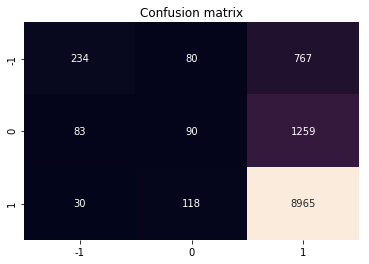

In [54]:
categories = [-1,0,1]
sns.heatmap(data=confusion_matrix(y_test2, nb2.predict(X_test2)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [65]:
import numpy as np
cm2 = np.matrix(cm)
FP = cm2.sum(axis=0) - np.diag(cm2)  
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

In [66]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)

ACC = (TP+TN)/(TP+FP+FN+TN)

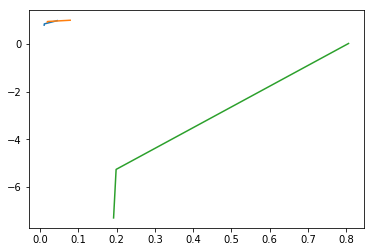

In [67]:
x = FPR
y = FNR
plt.plot(x,y)
plt.show() 

ROC-кривая